## Lab8 - Multivariable optimization
* submitted by Subrahmanyam (MM20S300)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D

### Q3) Using line (unidirectional) search, 
- for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2, 1). Plot the function and its contours along with the minimum value in that direction. Is the search direction a gradient descent one? Comment on that as well.

In [3]:
def J(w1,w2):
    return (w1-10)**2 + (w2-10)**2

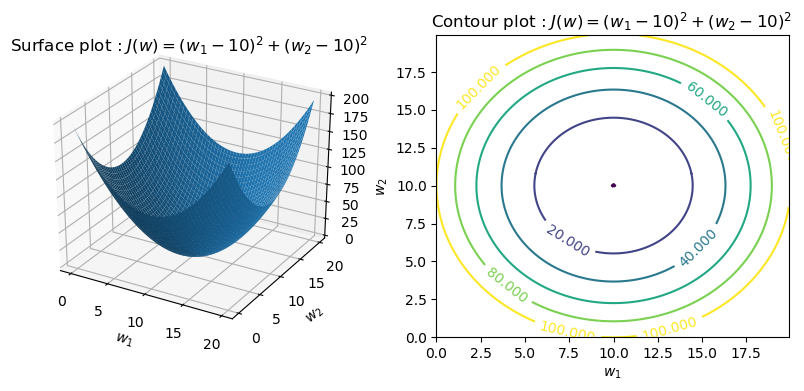

In [4]:
x = np.arange(0,20,0.1)
y = np.arange(0,20,0.1)
w1,w2 = np.meshgrid(x,y)
fig = plt.figure(figsize=(10,4),dpi=100)
ax1 = fig.add_subplot(121, projection='3d',title = r'Surface plot : $J(w) = (w_1 - 10)^2 + (w_2 - 10)^2$ ',xlabel=r'$w_1$',ylabel=r'$w_2$')
ax1.plot_surface(w1,w2,J(w1,w2))
ax2 = fig.add_subplot(122,title = r'Contour plot : $J(w) = (w_1 - 10)^2 + (w_2 - 10)^2$ ',xlabel=r'$w_1$',ylabel=r'$w_2$')
cs = plt.contour(w1,w2,J(w1,w2),[0.01,20,40,60,80,100])
plt.clabel(cs,inline=True,fontsize=10);

In [5]:
import numpy as np
class Optimize:
    def __init__(self,J):
        self.J = J                  # J is the funtion to optimize
    def bracket(self,a,b,n):
        delw = (b-a)/n
    
        w1 = a
        w2 = w1+delw
        w3 = w2+delw

        while (w3<b):
            j1 = self.J(w1)
            j2 = self.J(w2)
            j3 = self.J(w3)
    
            if j1>j2 and j2<j3:
                wmin=w2
                break
            else :
                w1=w2
                w2=w3
                w3=w2+delw
        return np.asarray([w1,w3]),wmin
    def interval_half(self,a,b,epsilon):

        L = b-a #length of the interval
    
        while (abs(L) > epsilon):
            wm = (a+b)/2 #middle point 
            jm = self.J(wm)
            w1 = a+L/4
            w2 = b-L/4
            j1 = self.J(w1)
            j2 = self.J(w2)
            if j1 < jm:
                b = wm
                wm = w1
                break
            elif j2 < jm:
                a = wm
                wm = w2
                break
            else:
                a = w1
                b = w2
            
            L = b-a
           
            
        return np.array([a,b]),(a+b)/2

    def unidir_search(self,a,b,epsilon,F):
        """
        Unidirectional Search Algorithm to find optimum value
        a,b : interval for single variable optimization algorithm - alpha : [a,b]
        epsilon : accuracy for interval halfing method
        F : function in alpha 
        
        """

        #interval halfing
        L = b-a #length of the interval
    
        while (abs(L) > epsilon):
            wm = (a+b)/2 #middle point 
            jm = F(wm)
            w1 = a+L/4
            w2 = b-L/4
            j1 = F(w1)
            j2 = F(w2)
            if j1 < jm:
                b = wm
                wm = w1
                break
            elif j2 < jm:
                a = wm
                wm = w2
                break
            else:
                a = w1
                b = w2
            
            L = b-a
           
            
        return np.array([a,b]),(a+b)/2
    
    



###############################################################################


In [6]:
# x= start_point + alpha*direction, from this we find x and substitute in J gives the following F in alpha
#starting point is [2,1] and direction is [2,5] , then x1 = 2+2*alpha; x2 = 1+5*alpha , 
#hence F(alpha) = 29*(alpha**2) - 122*alpha + 145

def F(alpha):    
    return 29*(alpha**2) - 122*alpha + 145

def J(w1,w2):
    return (w1-10)**2 + (w2-10)**2

opt = Optimize(J)
uni = opt.unidir_search(0.5,3.5,10e-3,F)
print(f'The optimum value lies in {uni[0]} and approximately alpha_opt =  {uni[1]}')

## we chose the interval for alpha in the beginning as [0.5,3,5] and then x = [3,3.5], new x for aptmized alpha will be
x_opt = np.array([3,3.5]) + uni[1]*np.array([2,5])
print(f'The value of x for optimized alpha is {x_opt}')

The optimum value lies in [2.    2.375] and approximately alpha_opt =  2.1875
The value of x for optimized alpha is [ 7.375  14.4375]


### Q4) Using steepest gradient descent, find the local minimum for the function in the problem 3 (i.e. J(w1, w2) = (w1 - 10 )^2 + (w2 - 10)^2). While applying gradient descent, do the following 
- (a) Fixing the value for alpha 
- (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show the minimal point in that direction. 

In [10]:
dw = 0.001
def J(w):
    return (w[0]-10)**2 + (w[1]-10)**2

def Jdash(w,dw):
    return (J(w+dw) - J(w-dw))/2*dw

def Jddash(w,dw):
    return (J(w+dw) - 2*J(w) + J(w-dw))/dw**2

def gradJ(w):
    return np.asarray([2*(w[0]-10), 2*(w[1]-10)])

def newton_raphson(J,w,eps):
    
    while abs(Jdash(w,dw)) > eps:
        w = w - Jdash(w,dw)/Jddash(w,dw)
    return w


def unisearch(J,init,s,eps,alpha):
    w = init + alpha*s
    w_opt = newton_raphson(J,w,eps)
    alpha_opt = (w_opt-init)/s
    return w_opt,alpha_opt[0]


def steepest_descent(J,w,eps,alpha):
    
    while np.linalg.norm(gradJ(w)) > eps:
        s = -gradJ(w)
        a = unisearch(J,w,s,eps,alpha)
        w = a[0]
        
    return w
        
w_opt = steepest_descent(J,np.array([2,1]),10e-3,0.5)

print(f'The minimum point is {w_opt} and the function value is {J(w_opt)}') 

The minimum point is [10. 10.] and the function value is 0.0


In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 25 23:06:53 2021

@author: shiva
"""

import numpy as np
import math

phi = (1.0 + math.sqrt(5.0))/2.0


def golden_section_searcher(X, d, prev_val, lower, upper, epsilon):
    
    x1 = upper - ((phi - 1)*(upper - lower))
    x2 = lower + ((phi - 1)*(upper - lower))
    val = x1
    
    param2 = X - np.dot(x2, d)
    param2 = param2.tolist()
    
    param1 = X - np.dot(x1, d)
    param1 = param1.tolist()
    
    if J(param2) < J(param1):
        if x1 > x2:
            upper = x1
        else:
            lower = x1

    else:
        if x2 > x1:
            upper = x2
        else:
            lower = x2

    if abs(prev_val - val) <= epsilon:
        return val
    else:
        return golden_section_searcher(X, d, val, lower, upper, epsilon)



def derivate(f, X):
    h = 0.0000001
    delf = []
    
    for i in range(len(X)):
        E = np.zeros(len(X))
        E[i] = h
        vals = X + E
        delf.append((f(vals) - f(X))/h)
            
    return delf


def difference(X, Y):
    total = 0
    
    for i in range(len(X)):
        total = total + abs(X[i] - Y[i])
    total = total / len(X)
    

    return total


def steepest_descent(X, epsilon):
    
    while True:
        d = derivate(J, X)
        x_prev = X
        
        learning_rate = golden_section_searcher(X, d, 1, 0, 20, 0.0001)
        X = X - np.dot(learning_rate, d)
        X = X.tolist()
        
        if difference(x_prev, X) < epsilon:
            return x_prev
        
        
    return x_prev


#J(w1,w2) = (w1-10)^2 + (w2-10)^2
def J(w):
    
    return (w[0]-10)**2 + (w[1]-10)**2

w_min = [round(x,4) for x in steepest_descent([2,1],10e-3)]
J_min = J(w_min)

print(f'The minimum point is {w_min} and function value is {J_min}')

The minimum point is [9.9996, 9.9995] and function value is 4.1000000000128637e-07
